<a href="https://colab.research.google.com/github/anjalinagel12/Google-colab-notebook/blob/master/Document_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *


In [0]:
folder = 'aadhar'
file = 'aadhar.txt'

In [0]:
folder = 'pan'
file = 'pan.txt'

In [0]:
folder = 'passport'
file = 'passport.txt'

In [0]:
path = Path('data/documents')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [14]:
path.ls()


[PosixPath('data/documents/pan.txt'),
 PosixPath('data/documents/aadhar'),
 PosixPath('data/documents/passport'),
 PosixPath('data/documents/passport.txt'),
 PosixPath('data/documents/pan'),
 PosixPath('data/documents/models'),
 PosixPath('data/documents/aadhar.txt')]

In [15]:
download_images(path/file, dest, max_pics=200)


Error https://portal2.passportindia.gov.in/AppOnlineProject/images/5years/vision.jpg HTTPSConnectionPool(host='portal2.passportindia.gov.in', port=443): Read timed out. (read timeout=4)
Error https://portal2.passportindia.gov.in/AppOnlineProject/images/5years/slide3.jpg HTTPSConnectionPool(host='portal2.passportindia.gov.in', port=443): Read timed out. (read timeout=4)


In [0]:
classes = ['aadhar','pan','passport']


In [18]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)


aadhar


Image data/documents/aadhar/00000084.png has 1 instead of 3 channels


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:925: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
Image data/documents/aadhar/00000074.png has 4 instead of 3 channels
Image data/documents/aadhar/00000067.png has 1 instead of 3 channels
Image data/documents/aadhar/00000001.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/documents/aadhar/00000050.jpg'>
cannot identify image file <_io.BufferedReader name='data/documents/aadhar/00000088.jpg'>
Image data/documents/aadhar/00000090.png has 1 instead of 3 channels
Image data/documents/aadhar/00000099.jpg has 4 instead of 3 channels
pan


Image data/documents/pan/00000040.gif has 1 instead of 3 channels


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:925: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
Image data/documents/pan/00000041.png has 1 instead of 3 channels
Image data/documents/pan/00000074.png has 4 instead of 3 channels
Image data/documents/pan/00000067.png has 1 instead of 3 channels
Image data/documents/pan/00000095.jpeg has 4 instead of 3 channels
passport


Image data/documents/passport/00000053.png has 1 instead of 3 channels
Image data/documents/passport/00000082.png has 1 instead of 3 channels


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [20]:
data.classes


['aadhar', 'pan', 'passport']

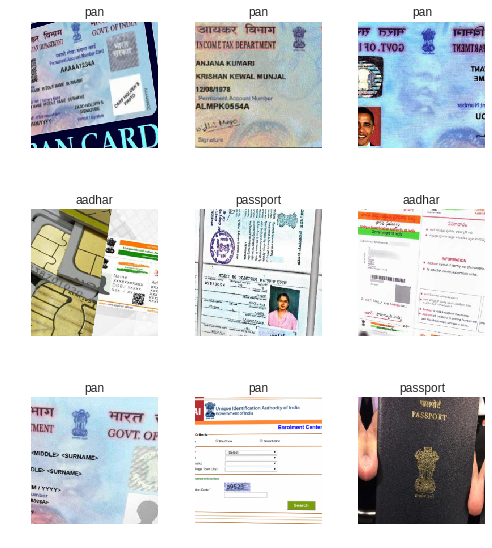

In [21]:
data.show_batch(rows=3, figsize=(7,8))


In [22]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['aadhar', 'pan', 'passport'], 3, 244, 60)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)


In [25]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,accuracy
1,1.403523,0.970537,0.600000
2,1.011052,0.645266,0.733333
3,0.826038,0.536360,0.783333
4,0.699079,0.481211,0.850000


In [0]:
learn.save('stage-1')


In [0]:
learn.unfreeze()


In [39]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.31E-06


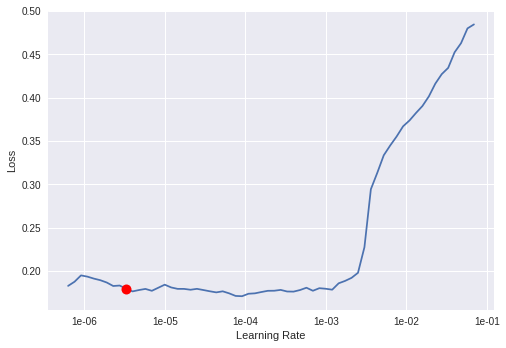

In [40]:
learn.recorder.plot()


In [42]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,accuracy
1,0.184658,0.820512,0.700000
2,0.189694,0.850065,0.683333


In [0]:
learn.save('stage-2')


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


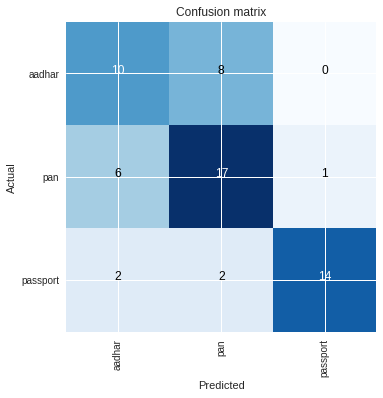

In [44]:
interp.plot_confusion_matrix()


In [45]:
learn.fit_one_cycle(4, max_lr=slice(3e-4,3e-3))


epoch,train_loss,valid_loss,accuracy
1,0.220889,1.031245,0.700000
2,0.224745,1.279948,0.683333
3,0.244893,1.356273,0.766667
4,0.275831,1.198506,0.766667


In [0]:
learn.save('stage-2')


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


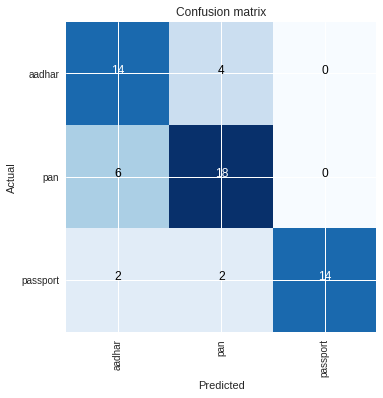

In [48]:
interp.plot_confusion_matrix()


In [0]:
from fastai.widgets import *


In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)


In [0]:
#ImageCleaner(ds, idxs, path)


In [0]:
#ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)


In [0]:
#ImageCleaner(ds, idxs, path, duplicates=True)


In [0]:
learn.export()


In [0]:
defaults.device = torch.device('cuda')


In [0]:
img = open_image(path/'aadhar'/'00000021.jpg')


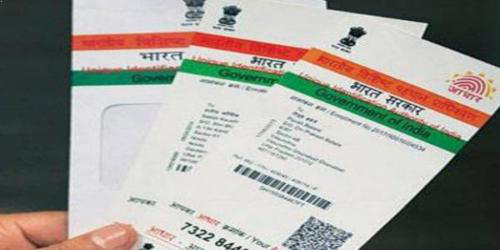

In [56]:
img

In [0]:
learn = load_learner(path)


In [58]:

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category aadhar